# Машинное обучение, ФКН ВШЭ

# Практическое задание 1

## Общая информация

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на Smorodinov-1990@mail.ru.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [2]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [ ]:
def max_element(arr):

    idx = np.where(arr == 0)[0]

    if len(idx) == 0:
        return 'None'
    elif idx[-1] == len(arr) - 1:
        idx = np.delete(idx, -1)
        
    arr_new = arr[idx+1]
    return np.max(arr_new)

x = np.array([6, 2, 3, 5, 7, 1])
print(max_element(x))    

None


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [48]:
def nearest_value(X, v):
    
    new_X = np.array(X).flatten()

    idx = np.argmin(abs(new_X - v))

    return new_X[idx]

X = np.arange(0,21).reshape((3, 7))
v = 6555

print('Исходная матрица:\n', X)
print('Число:\n', v)
print('Ближайшее число в матрице:', nearest_value(X, v))

Исходная матрица:
 [[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]]
Число:
 6555
Ближайшее число в матрице: 20


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [3]:
def scale(X):
    
    stds = np.std(X, axis=0)

    stds[stds == 0] = 1

    new_X = (X - np.mean(X, axis=0)) / stds

    return np.round(new_X, 4)

X = np.random.randint(0, 21, size=(3, 7))

print('Исходная матрица:\n', X)
print('\nИтоговая матрица:\n', scale(X))

Исходная матрица:
 [[ 5 20 14  2  7  5  6]
 [ 2 15 19  9 18 14 10]
 [17  6 11  8  0  3  9]]

Итоговая матрица:
 [[-0.4629  1.0933 -0.202  -1.4018 -0.18   -0.4877 -1.3728]
 [-0.9258  0.2302  1.3132  0.8627  1.3048  1.3935  0.9806]
 [ 1.3887 -1.3235 -1.1112  0.5392 -1.1248 -0.9058  0.3922]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [4]:
def get_stats(X):

    det = np.linalg.det(X)
    
    trace = np.trace(X)
    
    min_elem = np.min(X)
    max_elem = np.max(X)
    
    frob_norm = np.linalg.norm(X, 'fro')
    
    eigenvals = np.linalg.eigvals(X)
    
    try:
        inv_matrix = np.linalg.inv(X)
    except np.linalg.LinAlgError:
        inv_matrix = "Матрица вырожденная, обратной матрицы не существует"
    
    return {
        'determinant': det,
        'trace': trace,
        'min_element': min_elem,
        'max_element': max_elem,
        'frobenius_norm': frob_norm,
        'eigenvalues': eigenvals,
        'inverse_matrix': inv_matrix
    }

X = np.random.normal(loc=10, scale=1, size=(3, 3))
print("Исходная матрица:")
print(X)
print("\nХарактеристики матрицы:")
stats = get_stats(X)

print(f"\nОпределитель: {stats['determinant']:.4f}")
print(f"След: {stats['trace']:.4f}")
print(f"Наименьший элемент: {stats['min_element']:.4f}")
print(f"Наибольший элемент: {stats['max_element']:.4f}")
print(f"Норма Фробениуса: {stats['frobenius_norm']:.4f}")
print("\nСобственные числа:")
print(stats['eigenvalues'])
print("\nОбратная матрица:")
print(stats['inverse_matrix'])


Исходная матрица:
[[11.80660785  9.96986585 10.62189649]
 [ 9.83496744 10.37673615  9.7902849 ]
 [ 9.45070124 10.18643032  8.63103788]]

Характеристики матрицы:

Определитель: -21.3924
След: 30.8144
Наименьший элемент: 8.6310
Наибольший элемент: 11.8066
Норма Фробениуса: 30.3224

Собственные числа:
[30.26858974  1.15676542 -0.61097328]

Обратная матрица:
[[ 0.47521772 -1.03536344  0.58959184]
 [-0.35709307 -0.07100225  0.51999979]
 [-0.09890318  1.21748626 -1.1434312 ]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [5]:
max_elements = np.zeros(100)

for exp_num in range(100):
    A = np.random.normal(0, 1, size=(10, 10))
    B = np.random.normal(0, 1, size=(10, 10))
    
    C = np.dot(A, B)
    
    max_elements[exp_num] = np.max(C)

mean_max = np.mean(max_elements)
percentile_95 = np.percentile(max_elements, 95)

print(f"Среднее значение максимальных элементов: {mean_max:.4f}")
print(f"95-процентная квантиль: {percentile_95:.4f}")


Среднее значение максимальных элементов: 8.2339
95-процентная квантиль: 11.3568


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.kaggle.com/datasets/prajitdatta/data-stories-of-us-airlines).

In [6]:
import pandas as pd
%matplotlib inline

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [ ]:
df = pd.read_csv('airline_dec_2008_50k.csv', low_memory=False)

codes = {
    'A': 'Carrier',
    'B': 'Weather',
    'C': 'National Air System',
    'D': 'Security'
}

counts = df['CancellationCode'].value_counts()

print(f"\nСамая частая причина отмены рейса: {codes[counts.index[0]]}")



Самая частая причина отмены рейса: Weather


**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [16]:

print('Среднее расстояние', df['Distance'].mean())
print('Минимальное расстояние', df['Distance'].min())
print('Максимальное расстояние', df['Distance'].max())


Среднее расстояние 572.15812
Минимальное расстояние 30
Максимальное расстояние 3303


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [ ]:

min_distance = df['Distance'].min()

min_distance_flights = df[df['Distance'] == min_distance]

print(f"\nКоличество рейсов с минимальным расстоянием: {len(min_distance_flights)}")


print("\nИнформация о рейсах с минимальным расстоянием:")
print(min_distance_flights[['Year', 'Month', 'DayofMonth', "FlightNum"]].to_string())

flight = df[df['FlightNum'] == 5613]
print('\n')
print(flight[['Year', 'Month', 'DayofMonth', "Distance"]].to_string())



Количество рейсов с минимальным расстоянием: 1

Информация о рейсах с минимальным расстоянием:
       Year  Month  DayofMonth  FlightNum
16788  2008     12          31       5613


       Year  Month  DayofMonth  Distance
433    2008     12           1       403
15982  2008     12          28       429
16788  2008     12          31        30
19656  2008     12           1       429
22266  2008     12           2       429
24371  2008     12           2       403
25164  2008     12           3       429
27058  2008     12           3       403
28344  2008     12           4       429
29541  2008     12           4       403
29882  2008     12           5       429
32027  2008     12           5       403
32300  2008     12           6       429
34265  2008     12           7       429
35642  2008     12           7       403
36028  2008     12           8       429
38133  2008     12           8       403
38515  2008     12           9       429
40787  2008     12          10       42

**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [30]:
departure_counts = df['Origin'].value_counts()

most_departures_airport = departure_counts.index[0]
most_departures_count = departure_counts[0]

print(f"Аэропорт с наибольшим количеством вылетов: {most_departures_airport}")
print(f"Количество вылетов: {most_departures_count}")

Аэропорт с наибольшим количеством вылетов: ORD
Количество вылетов: 3056


C:\Users\Red\AppData\Local\Temp\ipykernel_15836\204849054.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  most_departures_count = departure_counts[0]


**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [35]:
airport_avg_airtime = df.groupby('Origin')['AirTime'].mean().sort_values(ascending=False)

max_airtime_airport = airport_avg_airtime.index[0]
max_airtime = airport_avg_airtime[0]
print(airport_avg_airtime)
print('\n')
print(f"Аэропорт с наибольшим средним временем полета: {max_airtime_airport}")
print(f"Среднее время полета: {max_airtime:.2f} минут")

Origin
PSE    182.120000
SJU    176.877551
BQN    163.736842
JFK    153.579151
ANC    144.278075
          ...    
SCC           NaN
STT           NaN
TEX           NaN
WRG           NaN
YAK           NaN
Name: AirTime, Length: 278, dtype: float64


Аэропорт с наибольшим средним временем полета: PSE
Среднее время полета: 182.12 минут


C:\Users\Red\AppData\Local\Temp\ipykernel_15836\3191595071.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_airtime = airport_avg_airtime[0]


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [36]:
def delayed_ratio(group):
    return (group['DepDelay'] > 0).mean()

airport_delays = df.groupby('Origin').filter(lambda x: len(x) >= 1000)
airport_delay_ratios = airport_delays.groupby('Origin').apply(delayed_ratio).sort_values(ascending=False)

max_delay_airport = airport_delay_ratios.index[0]
max_delay_ratio = airport_delay_ratios[0]

print(f"Аэропорт с наибольшей долей задержанных рейсов: {max_delay_airport}")
print(f"Доля задержанных рейсов: {max_delay_ratio:.2%}")

Аэропорт с наибольшей долей задержанных рейсов: LAX
Доля задержанных рейсов: 26.94%


C:\Users\Red\AppData\Local\Temp\ipykernel_15836\3515520594.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  airport_delay_ratios = airport_delays.groupby('Origin').apply(delayed_ratio).sort_values(ascending=False)
C:\Users\Red\AppData\Local\Temp\ipykernel_15836\3515520594.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_delay_ratio = airport_delay_ratios[0]


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [65]:
has_missing = df.isnull().any().any()
print(f"Имеются ли в данных пропущенные значения: {'Да' if has_missing else 'Нет'}")

total_missing = df.isnull().sum().sum()
print(f"Всего пропущенных элементов в таблице: {total_missing}")

objects_with_missing = df.isnull().any(axis=1).sum()
print(f"Количество объектов с хотя бы одним пропуском: {objects_with_missing}")

features_with_missing = df.isnull().any(axis=0).sum()
print(f"Количество признаков с хотя бы одним пропуском: {features_with_missing}")

Имеются ли в данных пропущенные значения: Да
Всего пропущенных элементов в таблице: 411549
Количество объектов с хотя бы одним пропуском: 50000
Количество признаков с хотя бы одним пропуском: 15


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [66]:
target_missing = df['DepDelay'].isnull().sum()
print(f"Количество пропущенных значений в целевой переменной: {target_missing}")

df_clean = df[~df['DepDelay'].isnull() & (df['DepDelay'] != 0)]

print(f"\nРазмер выборки после очистки: {len(df_clean)}")

# Выделяем целевую переменную
y = df_clean['DepDelay']
X = df_clean.drop('DepDelay', axis=1)

print(f"Размер матрицы признаков: {X.shape}")
print(f"Размер вектора целевой переменной: {y.shape}")

Количество пропущенных значений в целевой переменной: 17032

Размер выборки после очистки: 30003
Размер матрицы признаков: (30003, 29)
Размер вектора целевой переменной: (30003,)


**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [67]:
time_features = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']
    

df_new = df.copy()


for feature in time_features:
    if feature in df.columns:

        df_new[f'{feature}_Hour'] = df[feature].apply(lambda x: int(float(str(x).zfill(4)[:2])) if pd.notnull(x) and str(x).replace('.', '').isdigit() else np.nan)
        df_new[f'{feature}_Minute'] = df[feature].apply(lambda x: int(float(str(x).zfill(4)[2:])) if pd.notnull(x) and str(x).replace('.', '').isdigit() else np.nan)

        df_new = df_new.drop(feature, axis=1)
        
print("Новые признаки:")
for feature in ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']:
    print(f"\n{feature}:")
    print(f"Часы: {df_new[f'{feature}_Hour'].head()}")
    print(f"Минуты: {df_new[f'{feature}_Minute'].head()}")

Новые признаки:

DepTime:
Часы: 0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: DepTime_Hour, dtype: float64
Минуты: 0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: DepTime_Minute, dtype: float64

CRSDepTime:
Часы: 0    10
1    10
2    10
3    10
4    10
Name: CRSDepTime_Hour, dtype: int64
Минуты: 0    0
1    0
2    0
3    0
4    0
Name: CRSDepTime_Minute, dtype: int64

ArrTime:
Часы: 0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: ArrTime_Hour, dtype: float64
Минуты: 0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: ArrTime_Minute, dtype: float64

CRSArrTime:
Часы: 0    11
1    11
2    11
3    12
4    12
Name: CRSArrTime_Hour, dtype: int64
Минуты: 0     0
1    10
2    25
3    27
4    27
Name: CRSArrTime_Minute, dtype: int64


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [68]:
df_new = df_new.drop(['TailNum', 'Year'], axis=1)
features_to_drop = ['ArrDelay']
df_new = df_new.drop(features_to_drop, axis=1)

print("\nОставшиеся признаки:", list(df_new.columns))


Оставшиеся признаки: ['Unnamed: 0', 'Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'DepTime_Hour', 'DepTime_Minute', 'CRSDepTime_Hour', 'CRSDepTime_Minute', 'ArrTime_Hour', 'ArrTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute']


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<Axes: >

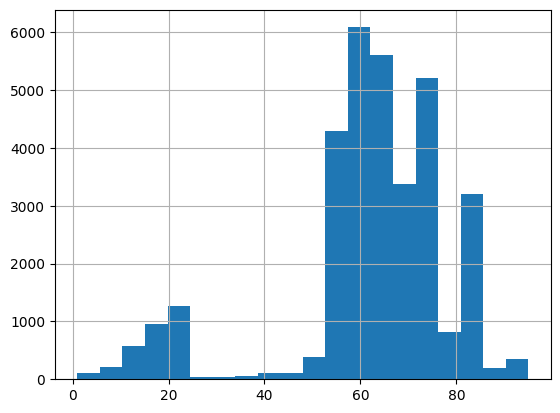

In [69]:
df_new['DepTime_Hour'].hist(bins=20)

<Axes: >

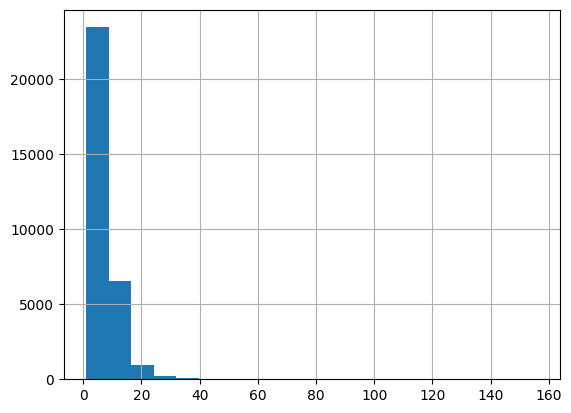

In [70]:
df_new['TaxiIn'].hist(bins=20)

<Axes: >

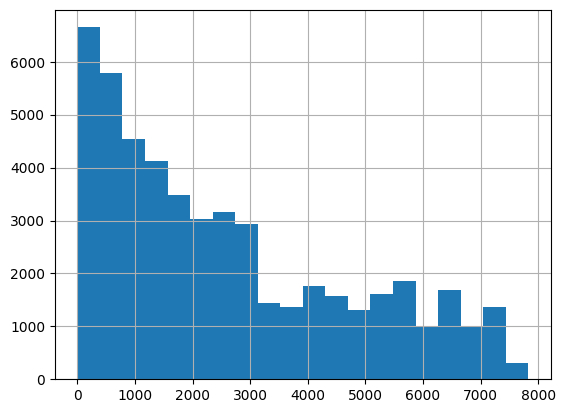

In [71]:
df_new['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [78]:
from sklearn.preprocessing import StandardScaler
def transform_data(data):
    df = data.copy()
    
    categorical_features = ['Month', 'DayOfWeek', "UniqueCarrier", 'Origin', 'Dest']
    
    numerical_features = [col for col in df.columns if col not in categorical_features]
    
    true_numerical_features = []
    for feature in numerical_features:
        try:
            pd.to_numeric(df[feature], errors='raise')
            true_numerical_features.append(feature)
        except (ValueError, TypeError):
            categorical_features.append(feature)
    
    # Обновляем список числовых признаков
    numerical_features = true_numerical_features
    # 1. Замена пропущенных значений
    # Для числовых признаков
    for feature in numerical_features:
        df[feature] = df[feature].fillna(0)
    
    # Для категориальных признаков
    for feature in categorical_features:
        df[feature] = df[feature].fillna('nan')
    
    # 2. Масштабирование числовых признаков
    if numerical_features:
        scaler = StandardScaler()
        df[numerical_features] = scaler.fit_transform(df[numerical_features])
    
    # 3. One-hot-кодирование категориальных признаков
    df = pd.get_dummies(df, columns=categorical_features, prefix=categorical_features)
    
    return df

result_df = transform_data(X)
    
print("Исходный датафрейм:")
print(df_new)
print("\nПреобразованный датафрейм:")
print(result_df) 

Исходный датафрейм:
       Unnamed: 0  Month  DayofMonth  DayOfWeek UniqueCarrier  FlightNum  \
0               1     12           1          1            WN         16   
1               2     12           1          1            US       2122   
2               3     12           1          1            MQ       3155   
3               4     12           1          1            EV       4980   
4               5     12           1          1            NW       1406   
...           ...    ...         ...        ...           ...        ...   
49995       49996     12          13          6            YV       2891   
49996       49997     12          13          6            CO        414   
49997       49998     12          13          6            WN        505   
49998       49999     12          13          6            AA       1336   
49999       50000     12          13          6            MQ       4673   

       ActualElapsedTime  CRSElapsedTime  AirTime  DepDelay  ...  \

**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [79]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Use the transformed data
X_transformed = result_df
y_target = y  # This is the target variable (DepDelay)

# Split the transformed data
X_train_transformed = X_transformed[:int(0.7 * len(X_transformed))]
X_test_transformed = X_transformed[int(0.7 * len(X_transformed)):]
y_train = y_target[:int(0.7 * len(y_target))]
y_test = y_target[int(0.7 * len(y_target)):]

# Take 1000 samples from training data
X_train_sample = X_train_transformed[:1000]
y_train_sample = y_train[:1000]

# Create and train the model
model = LinearRegression()
model.fit(X_train_sample, y_train_sample)

# Make predictions
y_train_pred = model.predict(X_train_sample)
y_test_pred = model.predict(X_test_transformed)

# Calculate metrics
train_mse = mean_squared_error(y_train_sample, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train_sample, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Metrics on training sample (1000 objects):")
print(f"MSE: {train_mse:.2f}")
print(f"R2: {train_r2:.2f}")
print("\nMetrics on test set:")
print(f"MSE: {test_mse:.2f}")
print(f"R2: {test_r2:.2f}")

print("\nTop 10 most influential features:")
feature_importance = pd.DataFrame({
    'Feature': X_train_transformed.columns,
    'Coefficient': model.coef_
})
feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)
print(feature_importance.head(10))

Metrics on training sample (1000 objects):
MSE: 1.07
R2: 1.00

Metrics on test set:
MSE: 65434.14
R2: -121.89

Top 10 most influential features:
             Feature  Coefficient
4188  TailNum_N904DA  1631.041844
531         Dest_SIT  1580.189580
1490  TailNum_N331UA  1531.755174
3844  TailNum_N785SW  1483.941916
857   TailNum_N14148  1379.758359
2146  TailNum_N455WN  1378.975892
2518  TailNum_N523SW  1343.122979
3992  TailNum_N824UA  1281.348282
1563  TailNum_N345NW  1275.764105
744   TailNum_N12114  1252.669164


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18. (0.5 балла)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [ ]:
# Your code here

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. 
Градиент MSPE по $w$ можно вычислить следующим образом:

$$ \frac{\partial}{\partial w} MSPE(w) = \frac{\partial}{\partial w} [\frac{1}{l} \frac{y^Ty - y^TXw - w^TX^Ty + w^TX^TXw}{y^Ty}]. $$

Продифференцируем каждое слагаемое отдельно.

$ \frac{\partial}{\partial w} [\frac{y^Ty}{y^Ty}] = 0. $

$ \frac{\partial}{\partial w} [\frac{- y^TXw}{y^Ty}] = \frac{-X^Ty}{y^Ty}. $

$ \frac{\partial}{\partial w} [\frac{- w^TX^Ty}{y^Ty}] = \frac{-X^Ty}{y^Ty}. $

$ \frac{\partial}{\partial w} [\frac{w^TX^TXw}{y^Ty}] = \frac{2X^TXw}{y^Ty}. $

Получаем уравнение для градиента MSPE:

$$ \frac{\partial}{\partial w} MSPE(w) = \frac{2}{l} * \frac{X^TXw -X^Ty}{y^Ty} = \frac{2*X^T}{l} * \frac{Xw - y}{y^Ty}. $$

Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19. (0 баллов)** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [ ]:
# Your code here

**20. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.


In [ ]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    pass

In [ ]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    pass

In [ ]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    pass

In [ ]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    pass

In [ ]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    pass

**21. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [ ]:
def grad_descent(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [ ]:
# Your code here

**22. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**23. (1 доп. балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [ ]:
def sgd(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [ ]:
# Your code here

**24. (0.5 доп. балла)** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

**25. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

In [ ]:
# Your code here

Здесь вы можете поделиться своими мыслями по поводу этого задания.

А здесь — вставить вашу любимую картинку.